Import libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import math

In [2]:
# import CSV data file
data=pd.read_csv("C:/Users/Admin/Downloads/bike/day - day.csv")

In [3]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data['dteday']=pd.to_datetime(data.dteday)
data['season']=data.season.astype('category')
data['yr']=data.yr.astype('category')
data['mnth']=data.mnth.astype('category')
data['holiday']=data.holiday.astype('category')
data['weekday']=data.weekday.astype('category')
data['workingday']=data.workingday.astype('category')
data['weathersit']=data.weathersit.astype('category')
data.describe()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6072\675165027.py:1: UserWarning: Parsing '13-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['dteday']=pd.to_datetime(data.dteday)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6072\675165027.py:1: UserWarning: Parsing '14-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['dteday']=pd.to_datetime(data.dteday)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6072\675165027.py:1: UserWarning: Parsing '15-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['dteday']=pd.to_datetime(data.dteday)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6072\675165027.py:1: UserWarning: Parsing '16-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['dteday']=pd.to_datetime(data.dteday)
C:\Users\Admin\AppData\Local

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


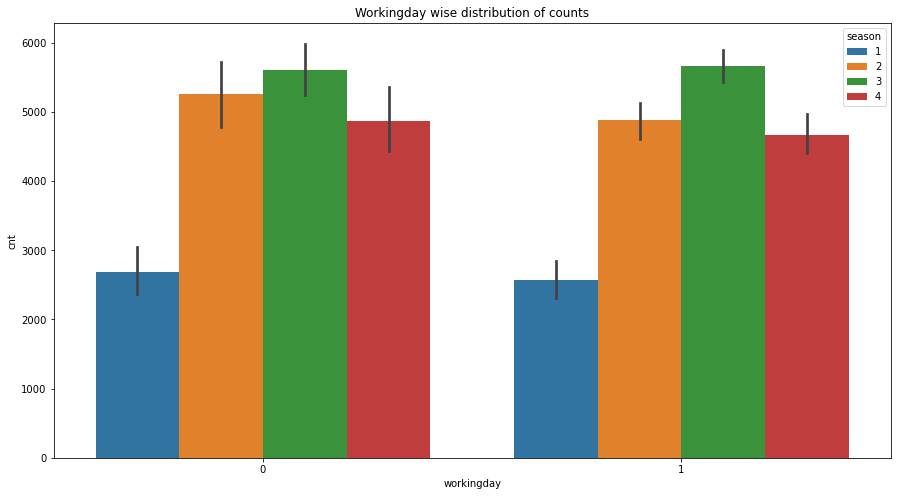

In [5]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=data,x='workingday',y='cnt',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

# Using Independent Variables

We are mention the independent variables of data.iloc [ : ,  -1]

In [7]:
#Split the dataset into the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.iloc[:,0:-3],data.iloc[:,-1],test_size=0.3, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(511, 14) (219, 14) (511, 2) (219, 2)
   index   cnt
0    683  5445
1    645  5478
2    163  5020
3    360  1162
4    640  7572
   index   cnt
0    468  7460
1    148  4788
2    302  3331
3    355  3068
4    515  7338


In [8]:
y_train

,index,cnt
0,683,5445
1,645,5478
2,163,5020
3,360,1162
4,640,7572
...,...,...
506,71,2417
507,106,3744
508,270,3907
509,435,5298


In [9]:
y_test

,index,cnt
0,468,7460
1,148,4788
2,302,3331
3,355,3068
4,515,7338
...,...,...
214,332,2914
215,532,6978
216,558,7499
217,137,3855


In [10]:
train_attributes=X_train[['season','mnth','yr','weekday','holiday','workingday','weathersit','hum','temp','windspeed']]
test_attributes=X_test[['season','mnth','yr','weekday','holiday','workingday','hum','temp','windspeed','weathersit']]
cat_attributes=['season','holiday','workingday','weathersit','yr']
num_attributes=['temp','windspeed','hum','mnth','weekday']
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (511, 18)


,mnth,weekday,hum,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,yr_0,yr_1
0,11,5,62.0417,13.188347,10.250129,0,0,0,1,1,0,0,1,0,1,0,0,1
1,10,2,70.9583,15.716653,12.708493,0,0,0,1,0,1,1,0,0,1,0,0,1
2,6,3,49.4583,26.035000,20.458450,0,1,0,0,1,0,0,1,1,0,0,1,0
3,12,4,76.2500,13.325000,12.626150,1,0,0,0,1,0,0,1,0,1,0,1,0
4,10,4,79.3750,26.957500,4.458569,0,0,0,1,1,0,0,1,0,1,0,0,1


In [11]:
# Modelling dataset
X_train=train_encoded_attributes
y_train=y_train.cnt.values

### Logistic Regression

In [12]:
LogisticRegression_model=linear_model.LinearRegression()
LogisticRegression_model

LinearRegression()

In [13]:
LogisticRegression_model.fit(X_train,y_train)

LinearRegression()

In [14]:
#Accuracy of the model
LogisticRegression=LogisticRegression_model.score(X_train,y_train)
print('Accuracy of the model :',LogisticRegression)
print('Model coefficients :',LogisticRegression_model.coef_)
print('Model intercept value :',LogisticRegression_model.intercept_)

Accuracy of the model : 0.8216308645194003
Model coefficients : [  -34.75974146    21.33203548   -10.43405868   122.0174073
   -38.49002522 -1088.0798365    225.56898785    24.97213249
   837.53871616   390.71933607  -390.71933607    84.53979323
   -84.53979323   782.4523786    301.44034076 -1083.89271936
  -988.08749738   988.08749738]
Model intercept value : 2396.7582934070697


In [15]:
#Cross validation prediction
predict=cross_val_predict(LogisticRegression_model,X_train,y_train,cv=3)

In [16]:
#To get dummy variables to encode the categorical features to numeric
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

Shape of transformed dataframe : (219, 18)


,mnth,weekday,hum,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,yr_0,yr_1
0,4,0,50.2917,20.295000,12.791439,0,1,0,0,1,0,1,0,1,0,0,0,1
1,5,2,81.8750,27.367500,14.333846,0,1,0,0,1,0,0,1,1,0,0,1,0
2,10,2,62.3750,13.085847,11.833339,0,0,0,1,1,0,0,1,1,0,0,1,0
3,12,6,75.7500,17.356653,3.167425,1,0,0,0,1,0,1,0,0,1,0,1,0
4,5,5,49.2917,27.880000,13.083693,0,1,0,0,1,0,0,1,1,0,0,0,1


In [17]:
X_test=test_encoded_attributes
y_test=y_test.cnt.values

In [18]:
LogisticRegression_pred=LogisticRegression_model.predict(X_test)

###  Decision Tree 

In [19]:
from sklearn.tree import DecisionTreeRegressor
Decision_Tree=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [20]:
Decision_Tree.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [21]:
predict=cross_val_predict(Decision_Tree,X_train,y_train,cv=3)

In [22]:
Decision_Tree_pred=Decision_Tree.predict(X_test)

In [23]:
Decision_Tree_score=Decision_Tree.score(X_train,y_train)
print('Accuracy of model :',Decision_Tree_score)

Accuracy of model : 0.8085603995650148


### Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
X_train=train_encoded_attributes
RandomForest=RandomForestRegressor(n_estimators=200)

In [25]:
RandomForest.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [26]:
RandomForest_score =RandomForest.score(X_train,y_train)
print('Accuracy of the model :',RandomForest_score)

Accuracy of the model : 0.9813973122135865


In [27]:
#Cross validation prediction
predict=cross_val_predict(RandomForest,X_train,y_train,cv=3)

In [28]:
X_test=test_encoded_attributes
RandomForest_pred=RandomForest.predict(X_test)

# 3 variables values of Predict the Demand Bikes

In [29]:
r2_scores = cross_val_score(LogisticRegression_model, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.8106976169686044


In [30]:
r2_scores = cross_val_score(Decision_Tree, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.7557219968896831


In [31]:
r2_scores = cross_val_score(RandomForest, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))


R-squared scores : 0.8613643060752779


# Metrics of Model Evaluation

In [32]:
rmse=math.sqrt(metrics.mean_squared_error(y_test,LogisticRegression_pred))
mae=metrics.mean_absolute_error(y_test,LogisticRegression_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 805.5701155108773
Mean absolute error : 603.8868105918996


In [33]:
rmse=math.sqrt(metrics.mean_squared_error(y_test,Decision_Tree_pred))
mae=metrics.mean_absolute_error(y_test,Decision_Tree_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 926.2182511199618
Mean absolute error : 700.3881889367293


In [34]:
rmse = math.sqrt(metrics.mean_squared_error(y_test,RandomForest_pred))
print('Root mean square error :',rmse)
mae=metrics.mean_absolute_error(y_test,RandomForest_pred)
print('Mean absolute error :',mae)

Root mean square error : 624.1906688429923
Mean absolute error : 432.4784703196347
